In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [53]:
df=pd.read_csv("../data/pokedex.csv")

In [54]:
df

Image  Index                     Name  Type 1   Type 2  Total  \
0        images/1.png      1                Bulbasaur   Grass   Poison    318   
1        images/2.png      2                  Ivysaur   Grass   Poison    405   
2        images/3.png      3                 Venusaur   Grass   Poison    525   
3        images/4.png      3   Venusaur Mega Venusaur   Grass   Poison    625   
4        images/5.png      4               Charmander    Fire      NaN    309   
...               ...    ...                      ...     ...      ...    ...   
1210  images/1211.png   1023               Iron Crown   Steel  Psychic    590   
1211  images/1212.png   1024    Terapagos Normal Form  Normal      NaN    450   
1212  images/1213.png   1024  Terapagos Terastal Form  Normal      NaN    600   
1213  images/1214.png   1024   Terapagos Stellar Form  Normal      NaN    700   
1214  images/1215.png   1025                Pecharunt  Poison    Ghost    600   

       HP  Attack  Defense  SP. Atk.  SP. Def  Speed  
0      45      49       49        65       65     45  
1      60      62       63        80       80     60  
2      80      82       83       100      100     80  
3      80     100      123       122      120     80  
4      39      52       43        60       50     65  
...   ...     ...      ...       ...      ...    ...  
1210   90      72      100       122      108     98  
1211   90      65       85        65       85     60  
1212   95      95      110       105      110     85  
1213  160     105      110       130      110     85  
1214   88      88      160        88       88     88  

[1215 rows x 12 columns]

In [55]:
pd.DataFrame(df.isnull().sum(), columns=['Missing values'])

Missing values
Image                  0
Index                  0
Name                   0
Type 1                 0
Type 2               546
Total                  0
HP                     0
Attack                 0
Defense                0
SP. Atk.               0
SP. Def                0
Speed                  0

In [56]:
pd.DataFrame((df.isnull().sum()/len(df))*100,columns=["Missing values %"])

Missing values %
Image             0.000000
Index             0.000000
Name              0.000000
Type 1            0.000000
Type 2           44.938272
Total             0.000000
HP                0.000000
Attack            0.000000
Defense           0.000000
SP. Atk.          0.000000
SP. Def           0.000000
Speed             0.000000

In [57]:
for col in df.select_dtypes(include='number'):
    print(f"{col} skewness is ",df[col].skew())
    print(f"{col} kurtosis is ",df[col].kurtosis())
    print("="*100)
   

Index skewness is  0.0343601469795642
Index kurtosis is  -1.21130410646666
Total skewness is  0.12050262215575648
Total kurtosis is  0.1203025460946634
HP skewness is  1.6066279791143752
HP kurtosis is  6.951876163295893
Attack skewness is  0.4166416317563492
Attack kurtosis is  -0.11096140768310292
Defense skewness is  1.1040145086332889
Defense kurtosis is  2.7712578127022933
SP. Atk. skewness is  0.6922239316546628
SP. Atk. kurtosis is  0.059551355588072674
SP. Def skewness is  0.8712288779328671
SP. Def kurtosis is  2.199752996297656
Speed skewness is  0.3628847694642505
Speed kurtosis is  -0.183460077797438


In [58]:
df['Type 2'].fillna("0",inplace=True)

C:\Users\Aryan raina\AppData\Local\Temp\ipykernel_11260\4086622829.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [59]:
df.describe()

Index        Total           HP       Attack      Defense  \
count  1215.000000  1215.000000  1215.000000  1215.000000  1215.000000   
mean    501.735802   443.104527    71.244444    81.152263    75.007407   
std     298.979081   121.193406    26.927819    32.037134    30.740999   
min       1.000000   175.000000     1.000000     5.000000     5.000000   
25%     240.500000   332.000000    52.000000    57.000000    52.000000   
50%     495.000000   465.000000    70.000000    80.000000    70.000000   
75%     753.500000   521.000000    85.000000   100.000000    91.000000   
max    1025.000000  1125.000000   255.000000   190.000000   250.000000   

          SP. Atk.      SP. Def        Speed  
count  1215.000000  1215.000000  1215.000000  
mean     73.224691    72.441152    70.034568  
std      32.757152    27.578188    30.161298  
min      10.000000    20.000000     5.000000  
25%      50.000000    51.000000    45.000000  
50%      65.000000    70.000000    68.000000  
75%      95.000000    90.000000    91.000000  
max     194.000000   250.000000   200.000000

C:\Users\Aryan raina\AppData\Local\Temp\ipykernel_11260\1689655231.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




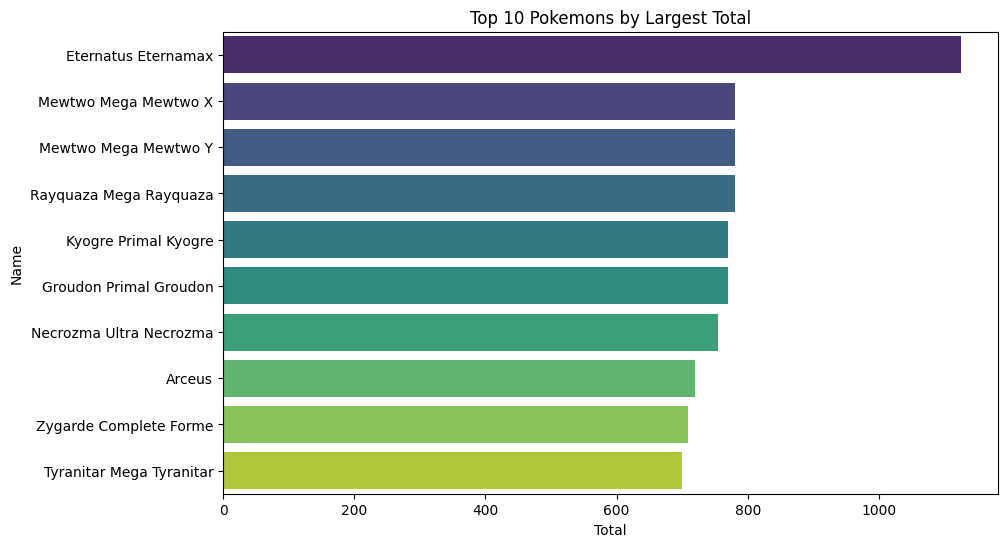

In [60]:
top_10_total = df.nlargest(10,"Total")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_total, x='Total', y='Name', palette='viridis')
plt.title("Top 10 Pokemons by Largest Total")
plt.xlabel("Total")
plt.ylabel("Name")
plt.show()

In [98]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Create a 1x2 subplot layout
top10_HP=df.nlargest(10,"HP")
top10_Attack=df.nlargest(10,"Attack")
top10_Defense=df.nlargest(10,"Defense")
top10_SPATK=df.nlargest(10,"SP. Atk.")
top10_SPDEF=df.nlargest(10,"SP. Def")
top10_speed=df.nlargest(10,"Speed")
fig = make_subplots(rows=2, cols=3, subplot_titles=("Top 10 Pokemon's with Highest Hit Point", "Top 10 Pokemon's with Highest Attack ability","Top 10 Pokemon's with Highest Defense ability",
                                                   "Top 10 Pokemon's with Highest Special Attack","Top 10 Pokemon's with Highest Base resistance against Special attacks","Top 10 Pokemon's with Highest Speed"))

# Add bar plot to the first subplot (left)
fig.add_trace(
    go.Bar(x=top10_HP['Name'], y=top10_HP['HP'], name="Top 10 Pokemon's with Highest Hit Point"),
    row=1, col=1
)

# Add histogram of prices to the second subplot (right)
fig.add_trace(
    go.Bar(x=top10_Attack['Name'],y=top10_Attack['Attack'], name="Top 10 Pokemon's with Highest Attack"),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=top10_Defense["Name"],y=top10_Defense["Defense"],name="Top 10 Pokemon's with Highest Defense ability"),
    row=1,col=3
)

fig.add_trace(
    go.Bar(x=top10_SPATK["Name"],y=top10_SPATK["SP. Atk."],name="Top 10 Pokemon's with Highest Base for Special Attack"),
    row=2,col=1
)

fig.add_trace(
    go.Bar(x=top10_SPDEF["Name"],y=top10_SPDEF["SP. Def"],name="Top 10 Pokemon's with Highest Base resistance against special attacks."),
    row=2,col=2
)
fig.add_trace(
    go.Bar(x=top10_speed["Name"],y=top10_speed["Speed"],name="Top 10 Pokemon's with Highest Speed"),
    row=2,col=3
)
# Update layout
fig.update_layout(
    title_text="Top 10 Analysis (Highest)",
    showlegend=False,
    title_font=dict(size=24,color='black'),
    title_x=0.5,
    height=800,
    width=1230


)
fig.update_annotations(font=dict(size=12, color="darkblue"))


fig.show()

C:\Users\Aryan raina\AppData\Local\Temp\ipykernel_11260\1646538693.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




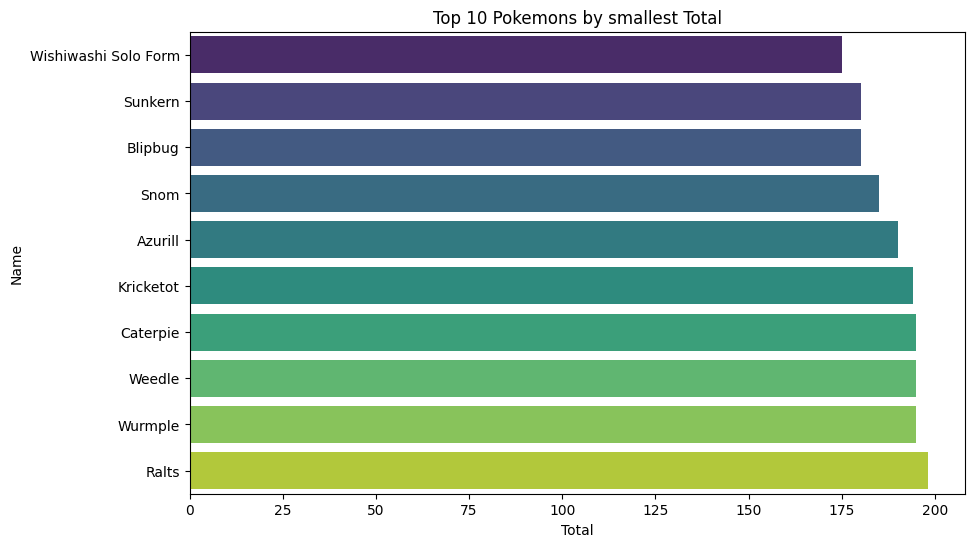

In [62]:
top_10_total = df.nsmallest(10,"Total")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_total, x='Total', y='Name', palette='viridis')
plt.title("Top 10 Pokemons by smallest Total")
plt.xlabel("Total")
plt.ylabel("Name")
plt.show()

In [97]:
top10_HP=df.nsmallest(10,"HP")
top10_Attack=df.nsmallest(10,"Attack")
top10_Defense=df.nsmallest(10,"Defense")
top10_SPATK=df.nsmallest(10,"SP. Atk.")
top10_SPDEF=df.nsmallest(10,"SP. Def")
top10_speed=df.nsmallest(10,"Speed")
fig = make_subplots(rows=2, cols=3, subplot_titles=("Top 10 Pokemon's with Lowest Hit Point", "Top 10 Pokemon's with Lowest Attack ability","Top 10 Pokemon's with Lowest Defense ability",
                                                   "Top 10 Pokemon's with Lowest Special Attack","Top 10 Pokemon's with Lowest Base resistance against Special attacks","Top 10 Pokemon's with Lowest Speed"))

# Add bar plot to the first subplot (left)
fig.add_trace(
    go.Bar(x=top10_HP['Name'], y=top10_HP['HP'], name="Top 10 Pokemon's with Lowest Hit Point"),
    row=1, col=1
)

# Add histogram of prices to the second subplot (right)
fig.add_trace(
    go.Bar(x=top10_Attack['Name'],y=top10_Attack['Attack'], name="Top 10 Pokemon's with Lowest Attack"),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x=top10_Defense["Name"],y=top10_Defense["Defense"],name="Top 10 Pokemon's with Lowest Defense ability"),
    row=1,col=3
)

fig.add_trace(
    go.Bar(x=top10_SPATK["Name"],y=top10_SPATK["SP. Atk."],name="Top 10 Pokemon's with Lowest Base for Special Attack"),
    row=2,col=1
)

fig.add_trace(
    go.Bar(x=top10_SPDEF["Name"],y=top10_SPDEF["SP. Def"],name="Top 10 Pokemon's with Lowest Base resistance against special attacks."),
    row=2,col=2
)
fig.add_trace(
    go.Bar(x=top10_speed["Name"],y=top10_speed["Speed"],name="Top 10 Pokemon's with Lowest Speed"),
    row=2,col=3
)
# Update layout
fig.update_layout(
    title_text="Top 10 Analysis (Lowest)",
    showlegend=False,
    title_font=dict(size=24,color='black'),
    title_x=0.5,
    height=800,
    width=1230


)
fig.update_annotations(font=dict(size=12, color="black"))


fig.show()

<Axes: xlabel='Total', ylabel='Count'>

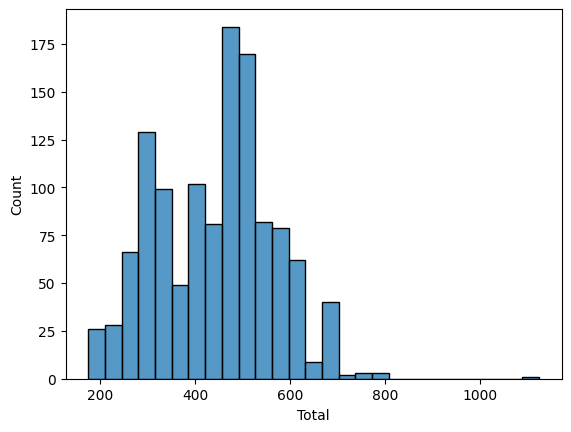

In [101]:
sns.histplot(x=df['Total'])

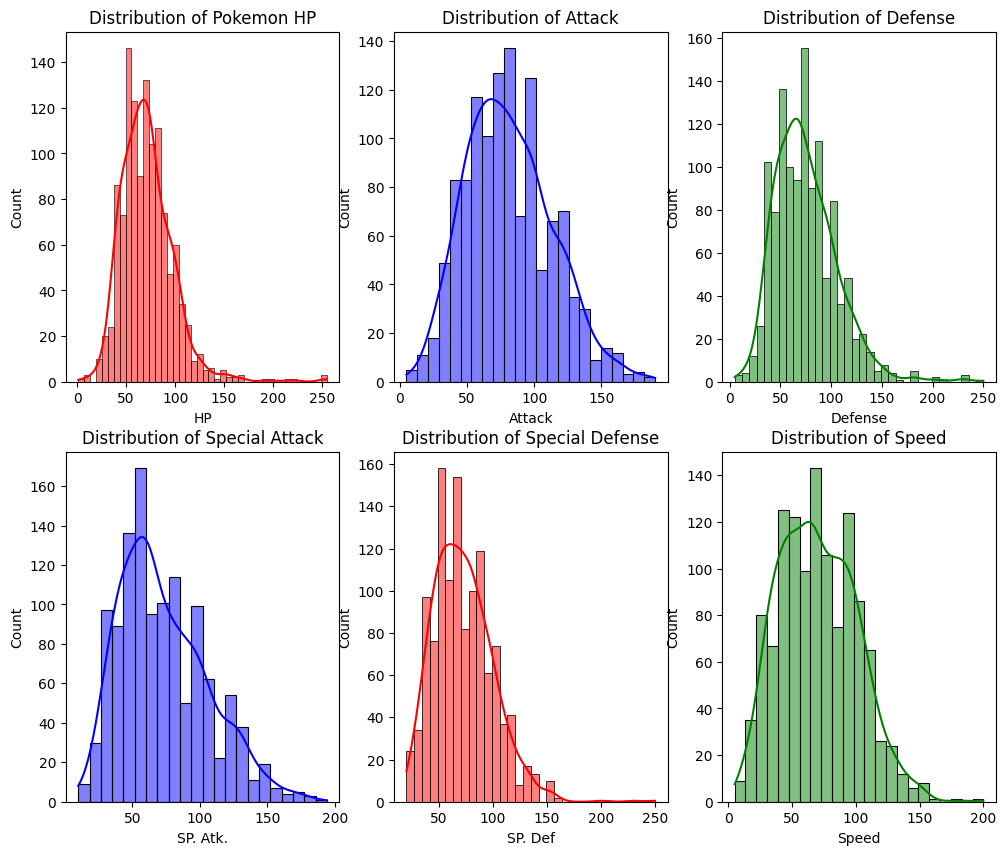

In [64]:
fig, axes = plt.subplots(2, 3, figsize=(12, 10))
sns.histplot(data=df,x=df['HP'],kde=True,color='red',ax=axes[0,0])
axes[0,0].set_title("Distribution of Pokemon HP")

sns.histplot(data=df,x=df['Attack'],kde=True,color='blue',ax=axes[0,1])
axes[0,1].set_title("Distribution of Attack")

sns.histplot(data=df,x=df['Defense'],kde=True,color='green',ax=axes[0,2])
axes[0,2].set_title("Distribution of Defense")

sns.histplot(data=df,x=df["SP. Atk."],kde=True,color="blue",ax=axes[1,0])
axes[1,0].set_title("Distribution of Special Attack")

sns.histplot(data=df,x=df["SP. Def"],kde=True,color="red",ax=axes[1,1])
axes[1,1].set_title("Distribution of Special Defense")

sns.histplot(data=df,x=df["Speed"],kde=True,color="green",ax=axes[1,2])
axes[1,2].set_title("Distribution of Speed")


plt.show()

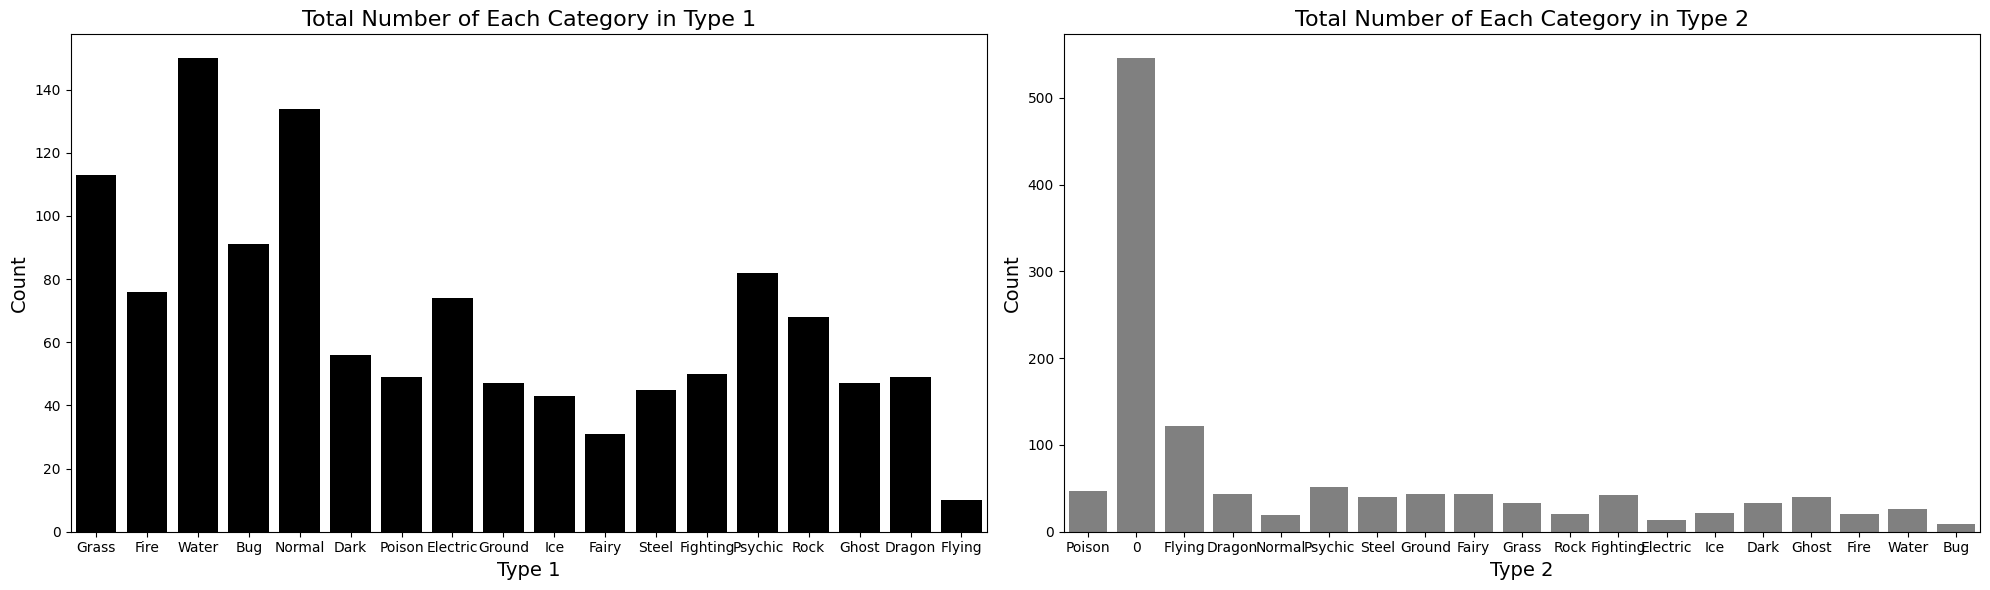

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Count plot for Type 1
sns.countplot(data=df, x='Type 1', color='black', ax=axes[0])
axes[0].set_title("Total Number of Each Category in Type 1", fontsize=16)
axes[0].set_xlabel("Type 1", fontsize=14)
axes[0].set_ylabel("Count", fontsize=14)


# Count plot for Type 2
sns.countplot(data=df, x='Type 2', color='grey', ax=axes[1])
axes[1].set_title("Total Number of Each Category in Type 2", fontsize=16)
axes[1].set_xlabel("Type 2", fontsize=14)
axes[1].set_ylabel("Count", fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

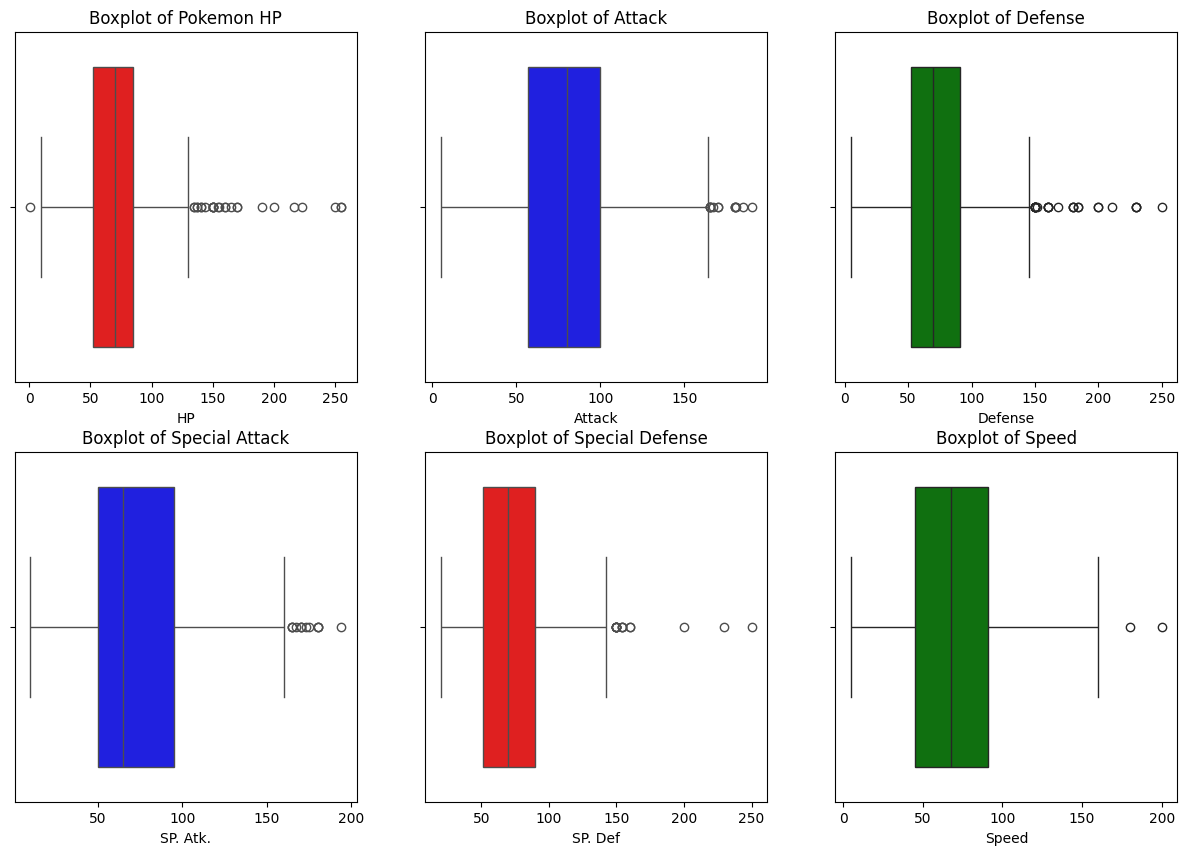

In [66]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(data=df,x=df['HP'],color='red',ax=axes[0,0])
axes[0,0].set_title("Boxplot of Pokemon HP")

sns.boxplot(data=df,x=df['Attack'],color='blue',ax=axes[0,1])
axes[0,1].set_title("Boxplot of Attack")

sns.boxplot(data=df,x=df['Defense'],color='green',ax=axes[0,2])
axes[0,2].set_title("Boxplot of Defense")

sns.boxplot(data=df,x=df["SP. Atk."],color="blue",ax=axes[1,0])
axes[1,0].set_title("Boxplot of Special Attack")

sns.boxplot(data=df,x=df["SP. Def"],color="red",ax=axes[1,1])
axes[1,1].set_title("Boxplot of Special Defense")

sns.boxplot(data=df,x=df["Speed"],color="green",ax=axes[1,2])
axes[1,2].set_title("Boxplot of Speed")
plt.show()

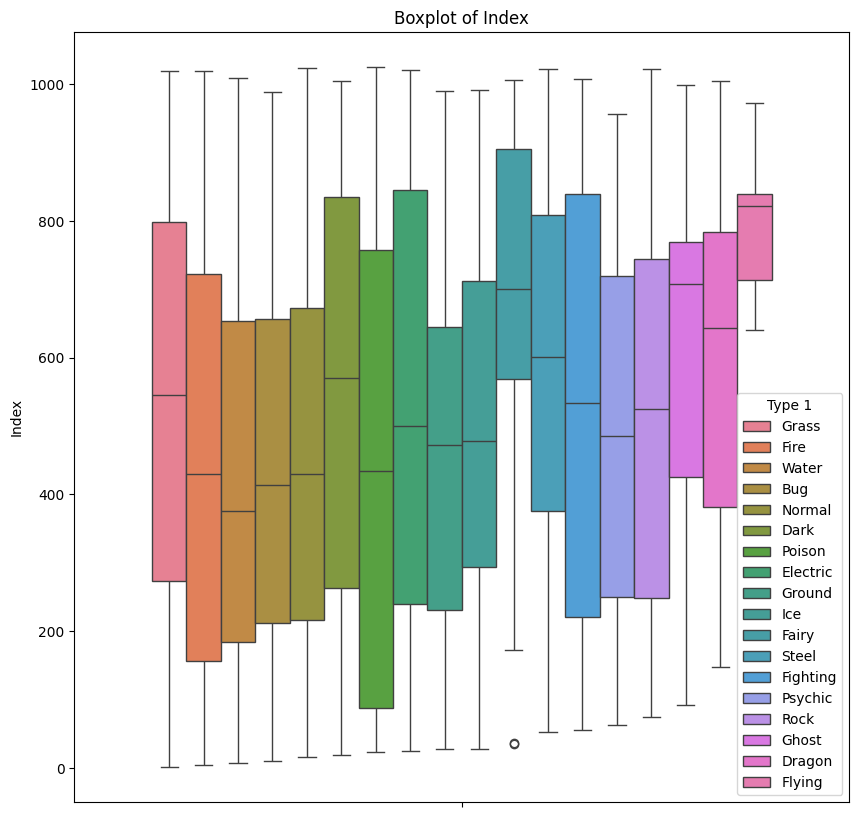

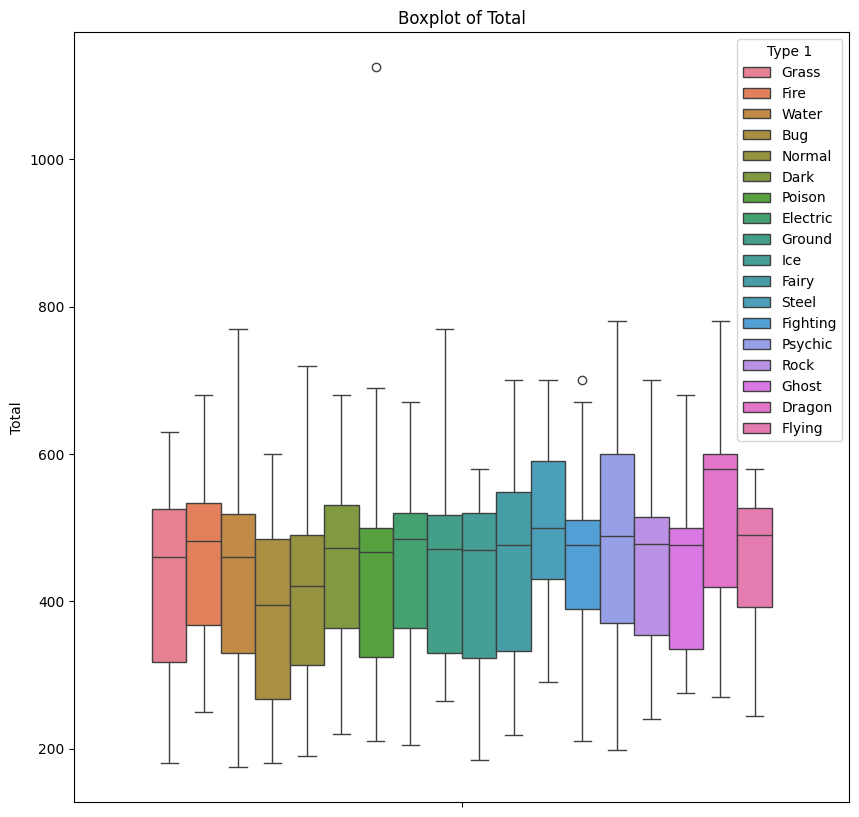

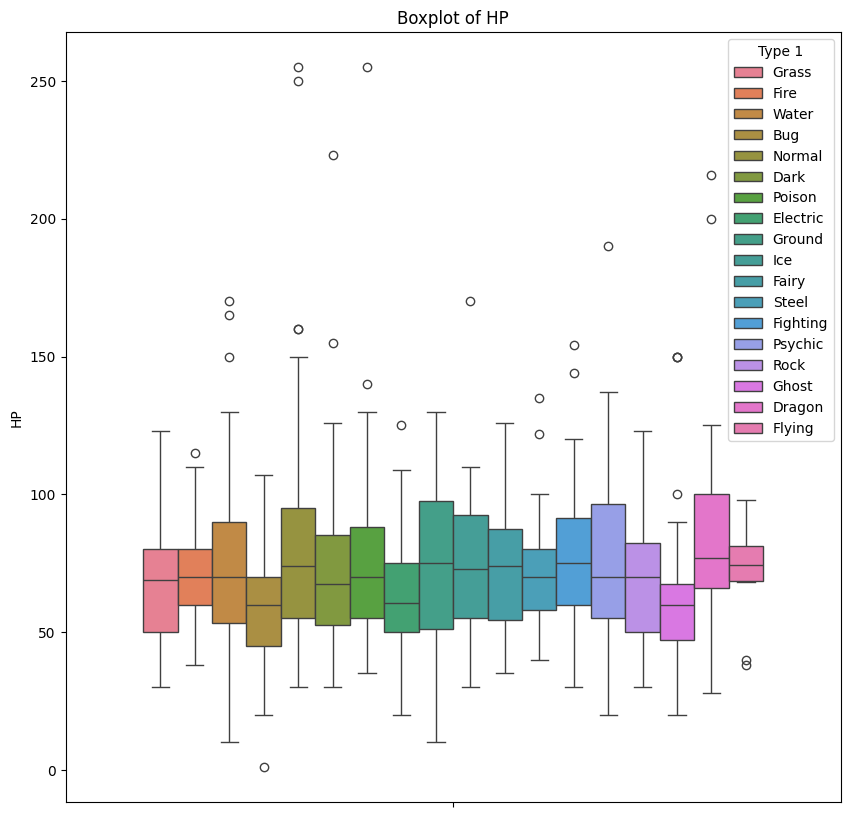

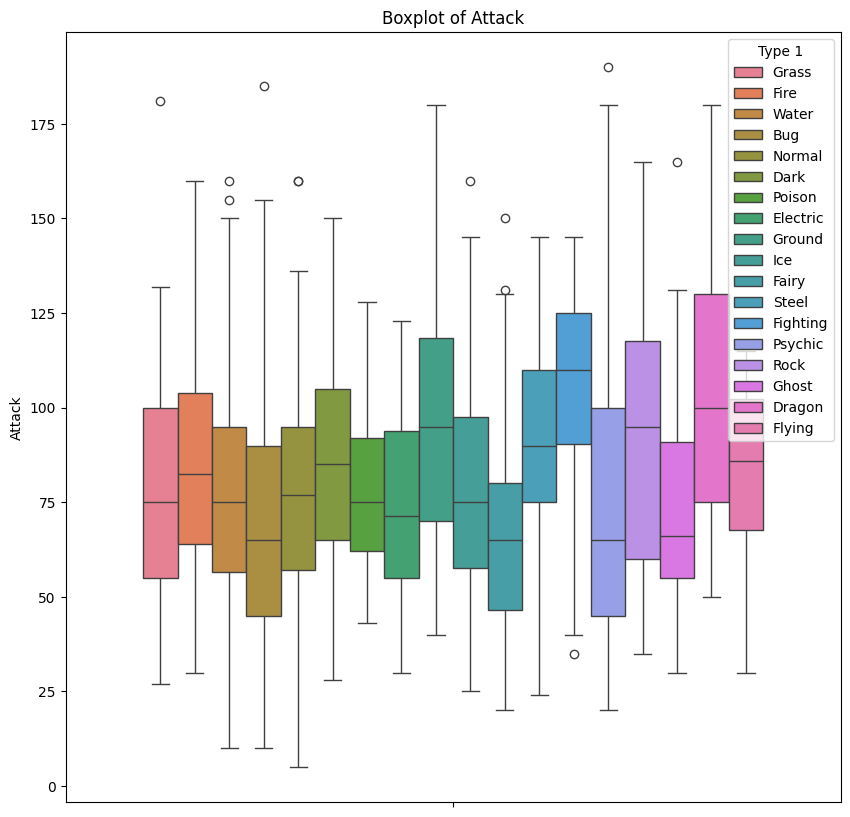

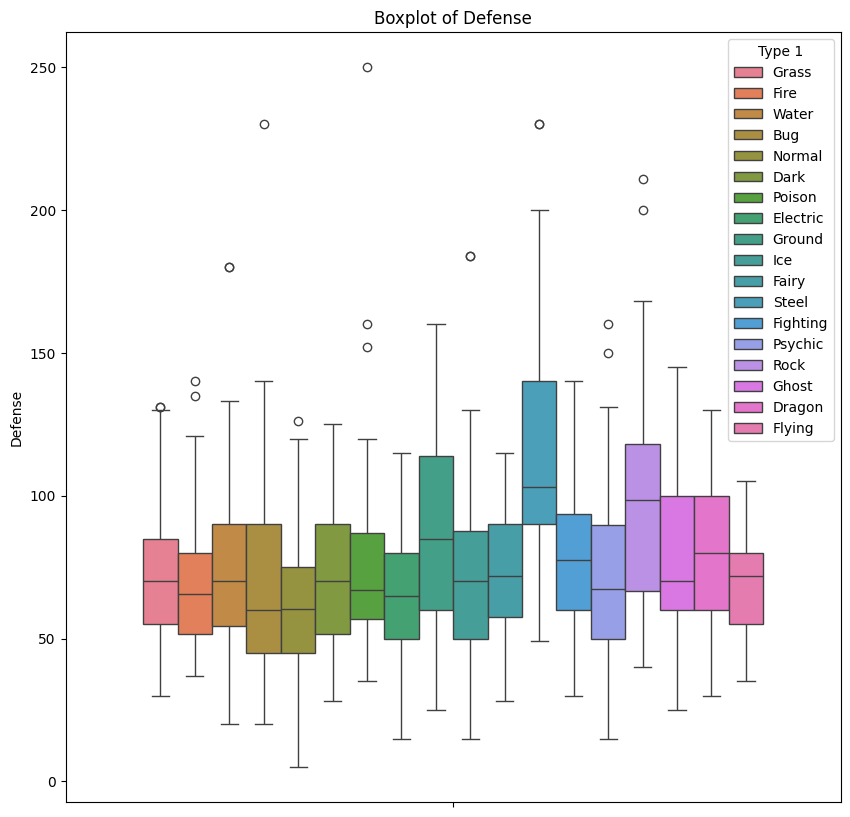

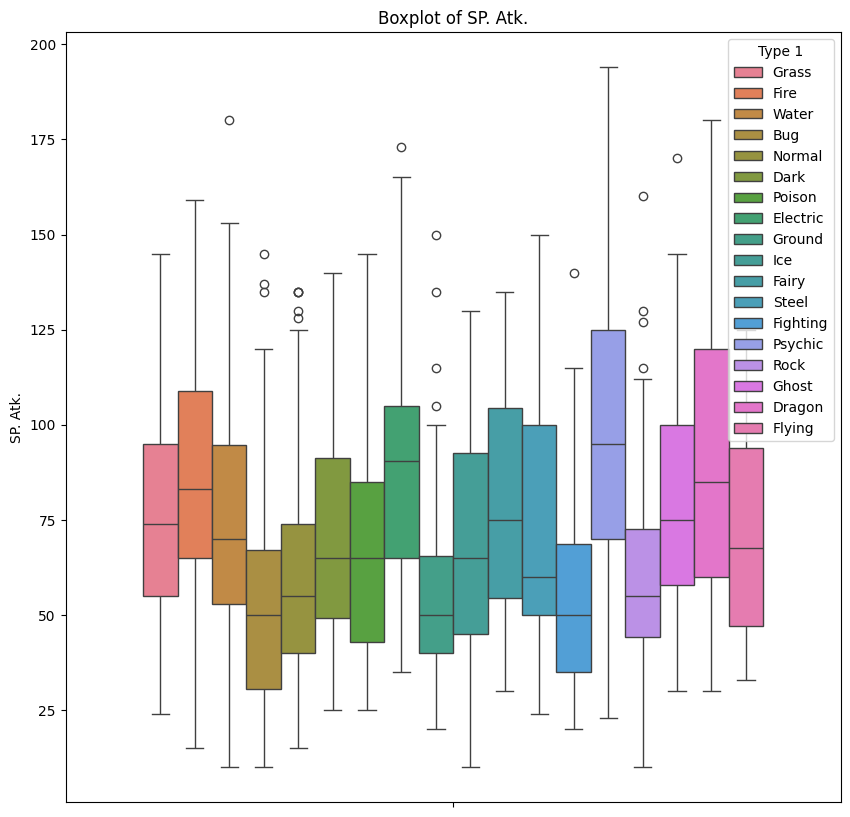

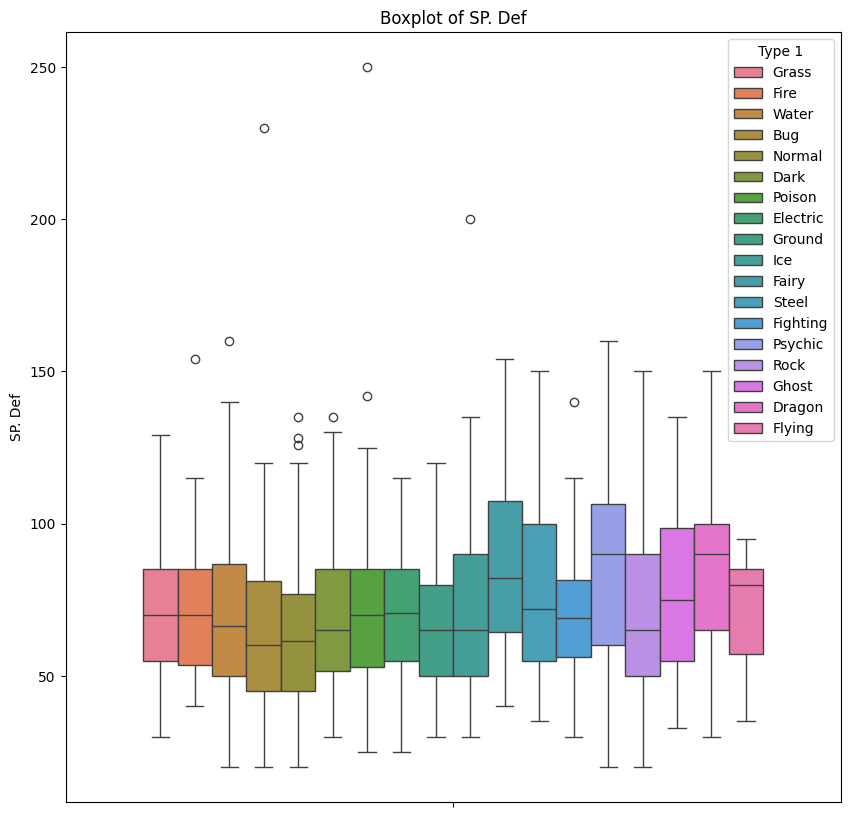

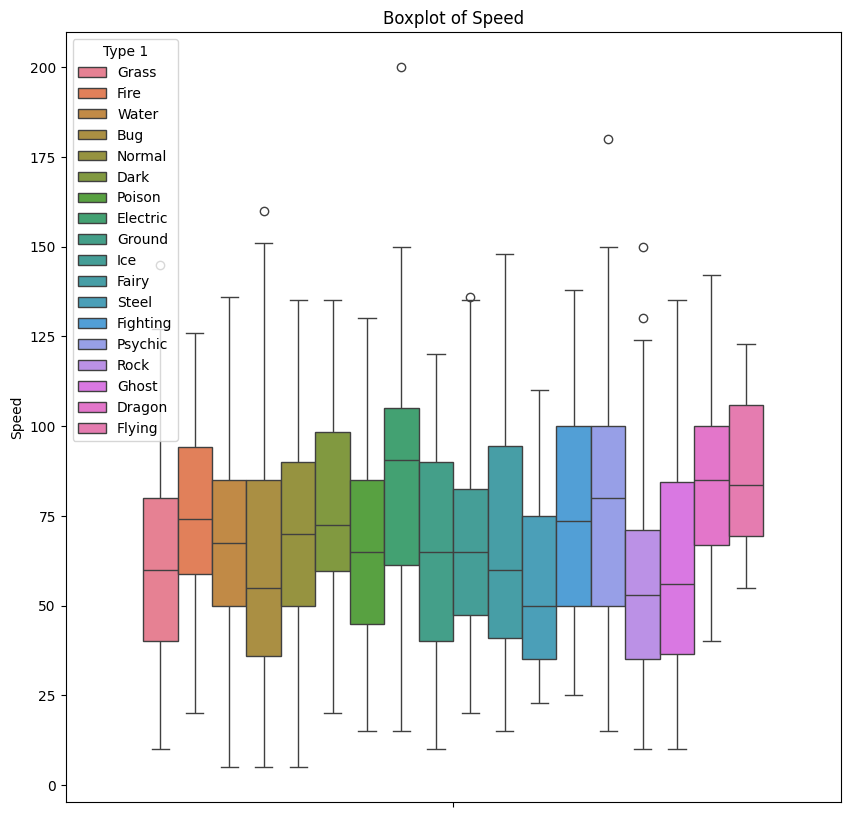

In [110]:
for col in df.select_dtypes(include="number"):
    plt.figure(figsize=(10,10))
    sns.boxplot(data=df,y=col,hue="Type 1",)
    plt.title(f"Boxplot of {col}")
    plt.xticks(rotation=90)
    plt.show()

In [67]:
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)  
(
	df
	.assign(outlier=model.fit_predict(
		df
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
	# .duration
	# .describe()
)


Image  Index                        Name    Type 1  Type 2  \
3        images/4.png      3      Venusaur Mega Venusaur     Grass  Poison   
8        images/9.png      6  Charizard Mega Charizard Y      Fire  Flying   
12      images/13.png      9    Blastoise Mega Blastoise     Water       0   
13      images/14.png     10                    Caterpie       Bug       0   
14      images/15.png     11                     Metapod       Bug       0   
...               ...    ...                         ...       ...     ...   
1187  images/1188.png   1003                     Ting-Lu      Dark  Ground   
1189  images/1190.png   1005                Roaring Moon    Dragon    Dark   
1191  images/1192.png   1007                    Koraidon  Fighting  Dragon   
1192  images/1193.png   1008                    Miraidon  Electric  Dragon   
1213  images/1214.png   1024      Terapagos Stellar Form    Normal       0   

      Total   HP  Attack  Defense  SP. Atk.  SP. Def  Speed  outlier  
3       625   80     100      123       122      120     80       -1  
8       634   78     104       78       159      115    100       -1  
12      630   79     103      120       135      115     78       -1  
13      195   45      30       35        20       20     45       -1  
14      205   50      20       55        25       25     30       -1  
...     ...  ...     ...      ...       ...      ...    ...      ...  
1187    570  155     110      125        55       80     45       -1  
1189    590  105     139       71        55      101    119       -1  
1191    670  100     135      115        85      100    135       -1  
1192    670  100      85      100       135      115    135       -1  
1213    700  160     105      110       130      110     85       -1  

[122 rows x 13 columns]

In [68]:
for col in df.select_dtypes(include="number"):
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1

    # Outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detecting outliers
    outliers = df[(df[col]< lower_bound) | (df[col] > upper_bound)]
    print(f"{col} column has {len(outliers)} outliers")

Index column has 0 outliers
Total column has 1 outliers
HP column has 27 outliers
Attack column has 13 outliers
Defense column has 25 outliers
SP. Atk. column has 13 outliers
SP. Def column has 15 outliers
Speed column has 2 outliers


In [69]:
num_cols_df=df.select_dtypes(include="number")
for col in num_cols_df:
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1

    # Outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detecting outliers
    outliers = num_cols_df[(num_cols_df[col]< lower_bound) | (num_cols_df[col] > upper_bound)]
    print("Column name: ", col)
    print(outliers)
    print("="*100)

Column name:  Index
Empty DataFrame
Columns: [Index, Total, HP, Attack, Defense, SP. Atk., SP. Def, Speed]
Index: []
Column name:  Total
      Index  Total   HP  Attack  Defense  SP. Atk.  SP. Def  Speed
1058    890   1125  255     115      250       125      250    130
Column name:  HP
      Index  Total   HP  Attack  Defense  SP. Atk.  SP. Def  Speed
53       40    435  140      70       45        85       50     45
151     113    450  250       5        5        35      105     50
190     143    540  160     110       65        65      110     30
258     202    405  190      33       58        33       58     33
305     242    540  255      10       10        75      135     55
359     289    670  150     160      100        95       65    100
362     292    236    1      90       45        30       30     40
367     297    474  144     120       60        40       60     50
397     321    500  170      90       45        90       45     60
524     426    498  150      80       44  

In [70]:
iqr_outliers = set()
num_cols_df = df.select_dtypes(include="number")

for col in num_cols_df.columns:
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1

    # Outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detecting outliers and adding row indices to a set
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    iqr_outliers.update(outliers.index)

# Detect outliers using Isolation Forest
model = IsolationForest()
isolation_forest_outliers = set(
    df.assign(outlier=model.fit_predict(num_cols_df))
      .query("outlier == -1")
      .index
)

# Find outliers unique to each method
iqr_only_outliers = iqr_outliers - isolation_forest_outliers
isolation_forest_only_outliers = isolation_forest_outliers - iqr_outliers

print("Outliers detected only by IQR method:", iqr_only_outliers)
print("Outliers detected only by Isolation Forest:", isolation_forest_only_outliers)
print("Outliers detected by both methods:", iqr_outliers & isolation_forest_outliers)

Outliers detected only by IQR method: {480, 805, 362, 843, 524, 844, 815, 367, 436, 53, 503, 954}
Outliers detected only by Isolation Forest: {1026, 3, 8, 1034, 12, 13, 14, 1036, 16, 19, 1050, 539, 1053, 1054, 1055, 1056, 549, 1065, 1066, 1072, 52, 63, 64, 1092, 1094, 1096, 592, 594, 83, 596, 84, 85, 605, 1134, 1139, 1144, 124, 1149, 1162, 1167, 1168, 1170, 1174, 1177, 1181, 1182, 1183, 674, 676, 1188, 1189, 1191, 1192, 173, 175, 1208, 189, 200, 225, 227, 245, 772, 271, 792, 816, 817, 319, 349, 861, 862, 867, 368, 902, 903, 924, 928, 427, 948, 951, 953, 959, 960, 967, 458, 469, 470, 472, 985, 474, 477}
Outliers detected by both methods: {128, 258, 1155, 1157, 264, 777, 265, 776, 905, 397, 272, 274, 151, 1175, 1057, 1058, 546, 545, 1187, 1063, 1064, 1068, 1069, 305, 949, 950, 312, 313, 314, 956, 1213, 190, 1214, 957, 961, 578, 579, 966, 839, 201, 202, 970, 718, 462, 463, 464, 465, 467, 597, 598, 86, 471, 857, 858, 473, 475, 478, 479, 352, 865, 866, 869, 359, 235, 108, 379, 505, 378, 123

In [95]:
df[df.index.isin(list(iqr_outliers))]

Image  Index                    Name    Type 1    Type 2  \
53      images/54.png     40              Wigglytuff    Normal     Fairy   
86      images/87.png     65  Alakazam Mega Alakazam   Psychic         0   
108    images/109.png     80    Slowbro Mega Slowbro     Water   Psychic   
123    images/124.png     91                Cloyster     Water       Ice   
127    images/128.png     94      Gengar Mega Gengar     Ghost    Poison   
...               ...    ...                     ...       ...       ...   
1157  images/1158.png    977                 Dondozo     Water         0   
1175  images/1176.png    992              Iron Hands  Fighting  Electric   
1187  images/1188.png   1003                 Ting-Lu      Dark    Ground   
1213  images/1214.png   1024  Terapagos Stellar Form    Normal         0   
1214  images/1215.png   1025               Pecharunt    Poison     Ghost   

      Total   HP  Attack  Defense  SP. Atk.  SP. Def  Speed  
53      435  140      70       45        85       50     45  
86      600   55      50       65       175      105    150  
108     590   95      75      180       130       80     30  
123     525   50      95      180        85       45     70  
127     600   60      65       80       170       95    130  
...     ...  ...     ...      ...       ...      ...    ...  
1157    530  150     100      115        65       65     35  
1175    570  154     140      108        50       68     50  
1187    570  155     110      125        55       80     45  
1213    700  160     105      110       130      110     85  
1214    600   88      88      160        88       88     88  

[82 rows x 12 columns]

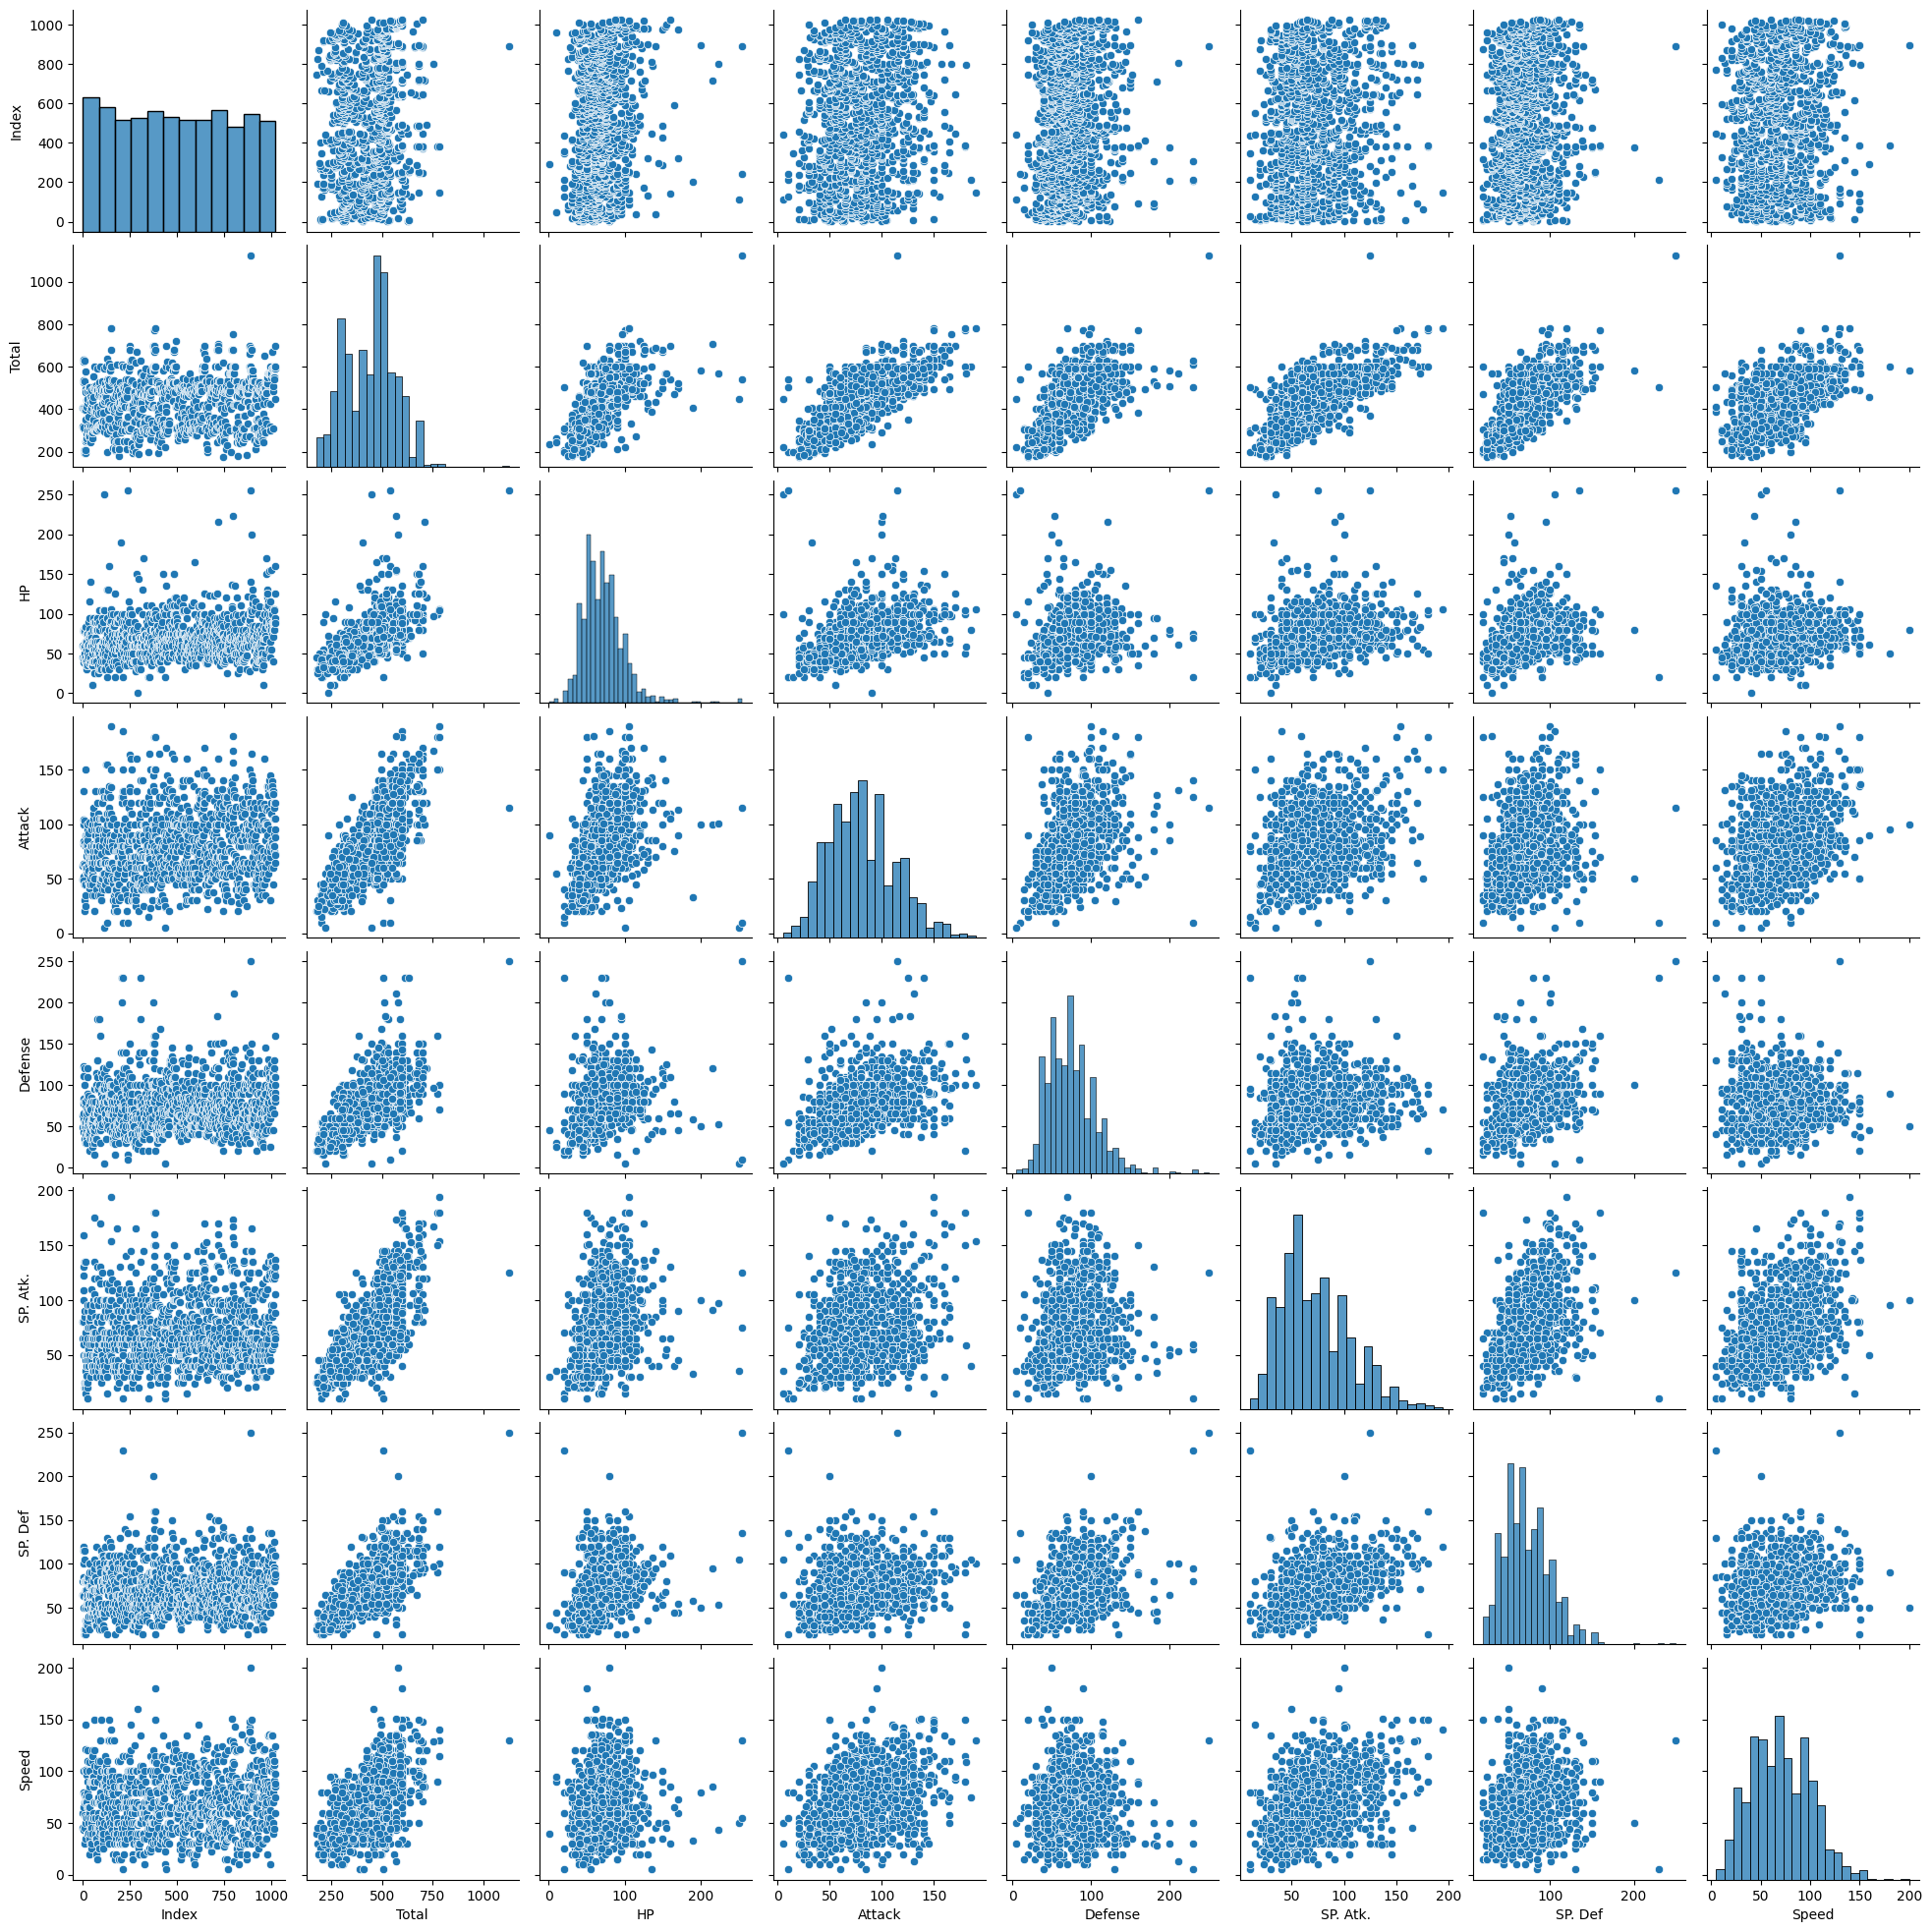

In [71]:
sns.pairplot(df)

<Axes: >

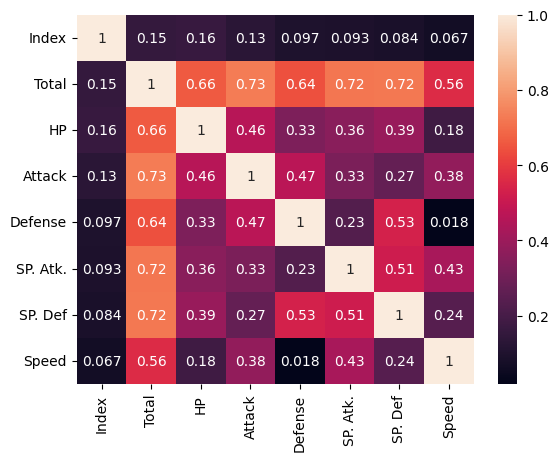

In [72]:
sns.heatmap(df.select_dtypes('int').corr(),annot=True)

In [73]:
columns = df.select_dtypes(include='int64').columns[1:]
num_plots = len(columns)
for i in range(num_plots):
    for j in range(i + 1, num_plots):
        type1 = columns[i]
        type2 = columns[j]

        fig = px.scatter(df, 
                 x=type1, 
                 y=type2, 
                 color='Type 1',
                 title=f'{type1} vs {type2} by Type 1',
                 labels={type1: type1 , type2: type2},
                 hover_name='Type 1')
        fig.show()